In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# open processed dataset
df = pd.read_csv('processed_data.csv')

In [ ]:
# extract labels and features and convert them to numpy array
labels = df['market_value_in_million'].to_numpy()
features = df.drop(['market_value_in_million'], axis=1).to_numpy()

In [ ]:
# data standardization on features
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [ ]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# plot the model with lines showing r2 score of training and validation data
def plot_ridge_model(validation_score, train_score, alphas_to_try, chosen_alpha):
    plt.figure(figsize = (8,5))
    sns.lineplot(y = validation_score, x = alphas_to_try, label = 'validation_data')
    sns.lineplot(y = train_score, x = alphas_to_try, label = 'training_data')
    plt.axvline(x=chosen_alpha, linestyle='--')
    plt.xlabel('alpha')
    plt.ylabel('r2')
    plt.title('Ridge Regression')
    plt.legend()
    plt.show()

In [ ]:
# tune the model by choosing the best alpha parameter
def tune_model(alphas_to_try, X, y, cv):
    validation_scores = []
    train_scores = []
    results_list = []
    
    # get the scores for each ridge model with different alpha
    for curr_alpha in alphas_to_try:   
        ridge_model = Ridge(alpha = curr_alpha)
        results = cross_validate(ridge_model, X, y, cv=cv, return_train_score = True)
        validation_scores.append(np.mean(results['test_score']))
        train_scores.append(np.mean(results['train_score']))
        results_list.append(results)
    
    # choose the best alpha
    chosen_alpha_id = np.argmax(validation_scores)
    chosen_alpha = alphas_to_try[chosen_alpha_id]
    # choose the training score with the best validation score
    training_score_with_max_val_score = train_scores[chosen_alpha_id]
    # choose the best validation score
    max_validation_score = np.max(validation_scores)
    
    # plot the model for comparison
    plot_ridge_model(validation_scores, train_scores, alphas_to_try, chosen_alpha)
    
    return chosen_alpha, training_score_with_max_val_score, max_validation_score

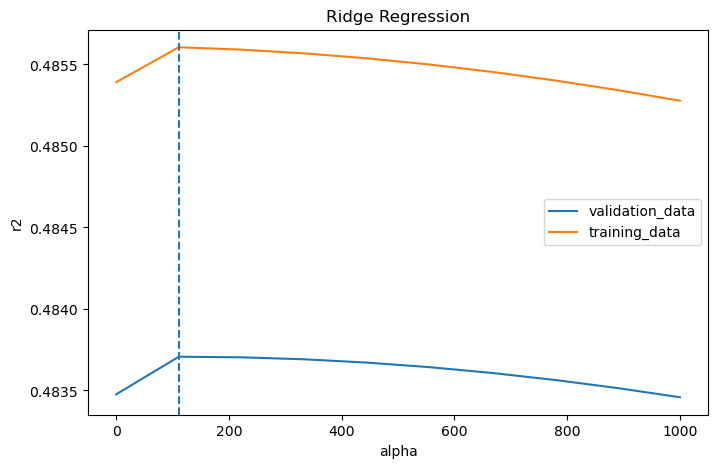

Chosen alpha: 111.11111
Training r2 score: 0.48561
Validation r2 score: 0.48371


In [ ]:
# tune model
cv = KFold(n_splits=3, shuffle=True, random_state=42)
ridge_alphas = np.linspace(0, 1000, 10)
chosen_alpha, training_score_with_max_val_score, max_validation_score = tune_model(ridge_alphas, X_train, y_train, cv)
print("Chosen alpha: %.5f" % chosen_alpha)
print("Training r2 score: %.5f" % training_score_with_max_val_score)
print("Validation r2 score: %.5f" % max_validation_score)

As we can see, training and validation r2 score are low and slightly different which we can conclude that the model is underfitting.

In [ ]:
# test model using chosen alpha (best alpha) from above
ridge_reg = Ridge(alpha=chosen_alpha)
ridge_reg.fit(X_train, y_train)
pred_test = ridge_reg.predict(X_test)
mae = mean_absolute_error(pred_test, y_test)
mse = mean_squared_error(pred_test, y_test)
rmse = mean_squared_error(pred_test, y_test, squared=False)
r2 = ridge_reg.score(X_test, y_test)
print('mean absolute error: %12.4f' % mae)
print('mean squared error: %14.4f' % mse)
print('root mean squared error: %8.4f' % rmse)
print('r^2: %28.4f' % r2)

mean absolute error:       2.8327
mean squared error:        28.6082
root mean squared error:   5.3487
r^2:                       0.5041
